# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import random
random.seed(0)

# Analisis Data

## Baca Data

In [2]:
data = pd.read_csv("data.csv")

## Print bentuk Data

In [3]:
data.head()

,NO,Kecamatan,JenisKelamin,Umur,Tahun
0,1,Tamalanrea,LAKI-LAKI,67,2018
1,2,Tallo,PEREMPUAN,33,2018
2,3,Tallo,LAKI-LAKI,51,2018
3,4,Panakukang,LAKI-LAKI,42,2018
4,5,Tallo,PEREMPUAN,61,2018


Cek Ukuran Data

In [4]:
data.shape

(998, 5)

Dari hasil tersebut dapat diperoleh bahwa data memiliki 7 atribut dan 998 baris data

## Cek Missing Value

In [5]:
data.isna().sum().sum()

0

Dapat dilihat dari hasil di atas, tidak ditemukan missing value pada dataset tersebut

## Analisis Unique Value per atribut

Menghitung jumlah unique value hanya dilakukan terhadap atribut **kategorik** (Umur tidak perlu)

In [6]:
print("Jumlah Unique value atribut Kecamatan : ", data.Kecamatan.nunique())
print("Jumlah Unique value atribut Jenis Kelamin : ", data.JenisKelamin.nunique())
print("Jumlah Unique value atribut Tahun : ", data.Tahun.nunique())

Jumlah Unique value atribut Kecamatan :  16
Jumlah Unique value atribut Jenis Kelamin :  2
Jumlah Unique value atribut Tahun :  3


### Karena terjadi perbedaan jumlah unique value dari atribut **Kecamatan** dan **jumlah kecematan Kecamatan di kota makassar** ada kemungkinan terdapat perbedaan

In [7]:
data.groupby('Kecamatan')['NO'].nunique()

Kecamatan
Biringkanaya      83
Bontoala          72
Makassar          87
Mamajang          25
Manggala         113
Mariso            30
Panakukang       136
Rappocini        100
Tallo            104
Tamalanrea        66
Tamalate          97
Ujung Pandang     17
Ujung Tanah       47
Ujung pandang      3
Wajo              17
tallo              1
Name: NO, dtype: int64

Dapat dilihat di atas perbedaan tadi terjadi akibat perbedaan penulisan **Ujung pandang** dengan **Ujung Pandang** dan **tallo** dengan **Tallo**. Untuk itu kita perlu menyamakannya terlebih dahulu.

In [8]:
data["Kecamatan"] = np.where(data["Kecamatan"] == "Ujung pandang", "Ujung Pandang", data["Kecamatan"])
data["Kecamatan"] = np.where(data["Kecamatan"] == "tallo", "Tallo", data["Kecamatan"])

In [9]:
print("Jumlah Unique value atribut Kecamatan: ", data.Kecamatan.nunique())

Jumlah Unique value atribut Kecamatan:  14


Dapat dilihat diatas, atribut **kecamatan** sudah sama dengan jumlah kecematan di makassar

## Menghapus Kolom

In [10]:
data.drop(columns=['NO'], inplace=True)
data.rename(columns={'JenisKelamin':'JK'}, inplace=True)

In [11]:
data.head()

,Kecamatan,JK,Umur,Tahun
0,Tamalanrea,LAKI-LAKI,67,2018
1,Tallo,PEREMPUAN,33,2018
2,Tallo,LAKI-LAKI,51,2018
3,Panakukang,LAKI-LAKI,42,2018
4,Tallo,PEREMPUAN,61,2018


Data yang akan dipakai:

## Aggregasi

In [12]:
data_group = data.groupby(['Kecamatan', 'Tahun', 'JK']).aggregate({
    'JK': 'count',
    'Umur': 'mean'
})

In [41]:
data_group

,Kecamatan,Tahun,JK,Jumlah,Umur
0,Biringkanaya,2018,LAKI-LAKI,12,50.166667
1,Biringkanaya,2018,PEREMPUAN,9,38.111111
2,Biringkanaya,2019,LAKI-LAKI,23,47.739130
3,Biringkanaya,2019,PEREMPUAN,17,36.941176
4,Biringkanaya,2020,LAKI-LAKI,16,38.875000
...,...,...,...,...,...
78,Wajo,2018,LAKI-LAKI,3,39.000000
79,Wajo,2019,LAKI-LAKI,4,34.000000
80,Wajo,2019,PEREMPUAN,5,50.400000
81,Wajo,2020,LAKI-LAKI,4,34.750000


In [14]:
data_group.columns = data_group.columns.map('_'.join)
data_group = data_group.reset_index()
data_group.rename(columns={'J_K':'Jumlah', 'U_m_u_r':'Umur'}, inplace=True)

In [15]:
data_group.head()

,Kecamatan,Tahun,JK,Jumlah,Umur
0,Biringkanaya,2018,LAKI-LAKI,12,50.166667
1,Biringkanaya,2018,PEREMPUAN,9,38.111111
2,Biringkanaya,2019,LAKI-LAKI,23,47.739130
3,Biringkanaya,2019,PEREMPUAN,17,36.941176
4,Biringkanaya,2020,LAKI-LAKI,16,38.875000


Buat dataframe baru untuk transformasi

In [16]:
data_model = pd.DataFrame(columns=['Kecamatan', 'Jumlah Laki-Laki 2018', 'Jumlah Perempuan 2018', 'Rata-Rata Usia Laki-Laki 2018', 'Rata-Rata Usia Perempuan 2018',
                                   'Jumlah Laki-Laki 2019', 'Jumlah Perempuan 2019', 'Rata-Rata Usia Laki-Laki 2019', 'Rata-Rata Usia Perempuan 2019',
                                   'Jumlah Laki-Laki 2020', 'Jumlah Perempuan 2020', 'Rata-Rata Usia Laki-Laki 2020', 'Rata-Rata Usia Perempuan 2020'])
data_model['Kecamatan'] = data_group['Kecamatan'].unique()

Loop untuk transformasi dari **data_group** ke **data_model**

In [17]:
for i in range(len(data_model)):
  kec = data_model['Kecamatan'][i]
  # 2018
  buff = data_group['Jumlah'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2018) & 
                                  (data_group['JK'] == 'LAKI-LAKI')]
  data_model['Jumlah Laki-Laki 2018'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Jumlah'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2018) & 
                                  (data_group['JK'] == 'PEREMPUAN')]
  data_model['Jumlah Perempuan 2018'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Umur'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2018) & 
                                  (data_group['JK'] == 'LAKI-LAKI')]
  data_model['Rata-Rata Usia Laki-Laki 2018'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Umur'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2018) & 
                                  (data_group['JK'] == 'PEREMPUAN')]
  data_model['Rata-Rata Usia Perempuan 2018'][i] = buff.values[0] if (len(buff)>0) else 0

  # 2019
  buff = data_group['Jumlah'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2019) & 
                                  (data_group['JK'] == 'LAKI-LAKI')]
  data_model['Jumlah Laki-Laki 2019'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Jumlah'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2019) & 
                                  (data_group['JK'] == 'PEREMPUAN')]
  data_model['Jumlah Perempuan 2019'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Umur'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2019) & 
                                  (data_group['JK'] == 'LAKI-LAKI')]
  data_model['Rata-Rata Usia Laki-Laki 2019'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Umur'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2019) & 
                                  (data_group['JK'] == 'PEREMPUAN')]
  data_model['Rata-Rata Usia Perempuan 2019'][i] = buff.values[0] if (len(buff)>0) else 0

  # 2020
  buff = data_group['Jumlah'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2020) & 
                                  (data_group['JK'] == 'LAKI-LAKI')]
  data_model['Jumlah Laki-Laki 2020'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Jumlah'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2020) & 
                                  (data_group['JK'] == 'PEREMPUAN')]
  data_model['Jumlah Perempuan 2020'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Umur'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2020) & 
                                  (data_group['JK'] == 'LAKI-LAKI')]
  data_model['Rata-Rata Usia Laki-Laki 2020'][i] = buff.values[0] if (len(buff)>0) else 0
  buff = data_group['Umur'].loc[(data_group['Kecamatan'] == kec) & 
                                  (data_group['Tahun'] == 2020) & 
                                  (data_group['JK'] == 'PEREMPUAN')]
  data_model['Rata-Rata Usia Perempuan 2020'][i] = buff.values[0] if (len(buff)>0) else 0

In [18]:
data_model

,Kecamatan,Jumlah Laki-Laki 2018,Jumlah Perempuan 2018,Rata-Rata Usia Laki-Laki 2018,Rata-Rata Usia Perempuan 2018,Jumlah Laki-Laki 2019,Jumlah Perempuan 2019,Rata-Rata Usia Laki-Laki 2019,Rata-Rata Usia Perempuan 2019,Jumlah Laki-Laki 2020,Jumlah Perempuan 2020,Rata-Rata Usia Laki-Laki 2020,Rata-Rata Usia Perempuan 2020
0,Biringkanaya,12,9,50.166667,38.111111,23,17,47.73913,36.941176,16,6,38.875,35.833333
1,Bontoala,10,13,42.5,42.230769,22,14,42.272727,41.642857,8,5,39.5,30.0
2,Makassar,21,10,38.809524,44.4,25,17,41.36,38.058824,8,6,47.375,40.666667
3,Mamajang,2,7,23.0,36.0,7,1,44.0,65.0,3,5,39.333333,33.6
4,Manggala,33,15,38.787879,29.933333,27,17,41.925926,29.411765,12,9,38.5,45.666667
5,Mariso,6,3,31.833333,44.666667,4,8,29.5,40.0,6,3,24.5,28.0
6,Panakukang,27,24,45.814815,40.5,27,21,49.259259,34.142857,23,14,38.73913,38.5
7,Rappocini,28,15,41.25,40.333333,22,17,37.454545,33.176471,9,9,34.0,37.555556
8,Tallo,17,20,42.470588,41.85,31,15,41.193548,39.466667,18,4,46.888889,36.75
9,Tamalanrea,20,8,44.25,38.875,15,8,35.866667,35.125,9,6,40.666667,31.0


Untuk menambahkan keragaman data dibuat variable baru yaitu Rasio Jenis Kelamin dari setiap tahunnya

In [19]:
data_model['Rasio JK 2018'] = data_model['Jumlah Perempuan 2018']/data_model['Jumlah Laki-Laki 2018']
data_model['Rasio JK 2019'] = data_model['Jumlah Perempuan 2019']/data_model['Jumlah Laki-Laki 2019']
data_model['Rasio JK 2020'] = data_model['Jumlah Perempuan 2020']/data_model['Jumlah Laki-Laki 2020']

In [20]:
data_model.head(14)

,Kecamatan,Jumlah Laki-Laki 2018,Jumlah Perempuan 2018,Rata-Rata Usia Laki-Laki 2018,Rata-Rata Usia Perempuan 2018,Jumlah Laki-Laki 2019,Jumlah Perempuan 2019,Rata-Rata Usia Laki-Laki 2019,Rata-Rata Usia Perempuan 2019,Jumlah Laki-Laki 2020,Jumlah Perempuan 2020,Rata-Rata Usia Laki-Laki 2020,Rata-Rata Usia Perempuan 2020,Rasio JK 2018,Rasio JK 2019,Rasio JK 2020
0,Biringkanaya,12,9,50.166667,38.111111,23,17,47.73913,36.941176,16,6,38.875,35.833333,0.75,0.73913,0.375
1,Bontoala,10,13,42.5,42.230769,22,14,42.272727,41.642857,8,5,39.5,30.0,1.3,0.636364,0.625
2,Makassar,21,10,38.809524,44.4,25,17,41.36,38.058824,8,6,47.375,40.666667,0.47619,0.68,0.75
3,Mamajang,2,7,23.0,36.0,7,1,44.0,65.0,3,5,39.333333,33.6,3.5,0.142857,1.666667
4,Manggala,33,15,38.787879,29.933333,27,17,41.925926,29.411765,12,9,38.5,45.666667,0.454545,0.62963,0.75
5,Mariso,6,3,31.833333,44.666667,4,8,29.5,40.0,6,3,24.5,28.0,0.5,2.0,0.5
6,Panakukang,27,24,45.814815,40.5,27,21,49.259259,34.142857,23,14,38.73913,38.5,0.888889,0.777778,0.608696
7,Rappocini,28,15,41.25,40.333333,22,17,37.454545,33.176471,9,9,34.0,37.555556,0.535714,0.772727,1.0
8,Tallo,17,20,42.470588,41.85,31,15,41.193548,39.466667,18,4,46.888889,36.75,1.176471,0.483871,0.222222
9,Tamalanrea,20,8,44.25,38.875,15,8,35.866667,35.125,9,6,40.666667,31.0,0.4,0.533333,0.666667


Ada **15 atribut** yang akan dimasukkan ke model

# Modelling

## Normalisasi Data

Menjadikan kecamatan sebagai Index

In [21]:
kecamatan = data_model['Kecamatan']
data_model.set_index('Kecamatan', inplace = True)

Normalize Data

In [22]:
x = data_model.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

## Silhouette Coefficient

Untuk n = 2 Rata-rata silhouette_score : 0.31184082384727496
Untuk n = 3 Rata-rata silhouette_score : 0.273108617381381
Untuk n = 4 Rata-rata silhouette_score : 0.21795390882568869
Untuk n = 5 Rata-rata silhouette_score : 0.170072288646225
Untuk n = 6 Rata-rata silhouette_score : 0.14709434613791242
Untuk n = 7 Rata-rata silhouette_score : 0.13013997519251583
Untuk n = 8 Rata-rata silhouette_score : 0.12454106739869461
Untuk n = 9 Rata-rata silhouette_score : 0.08721426908348177


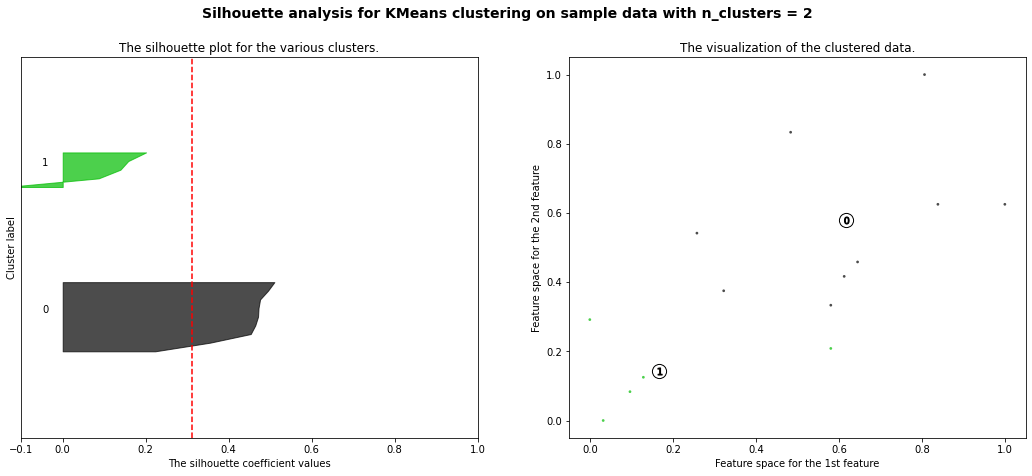

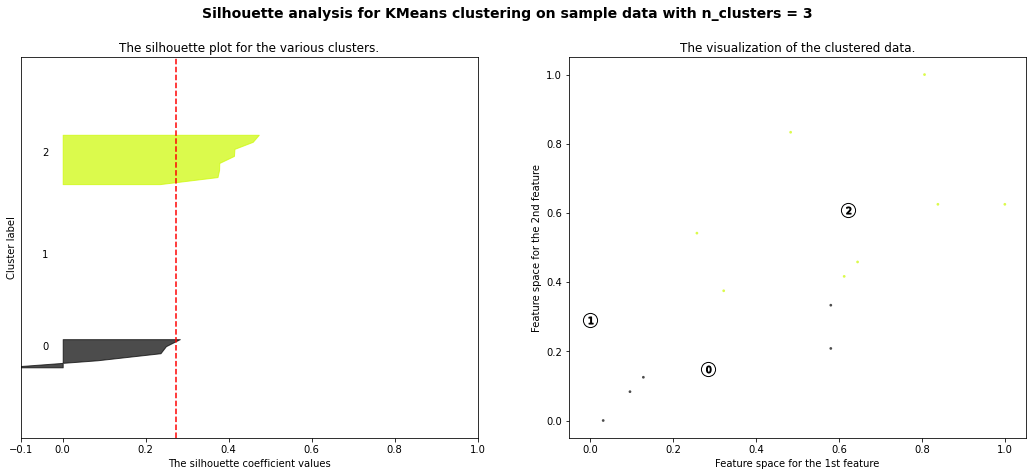

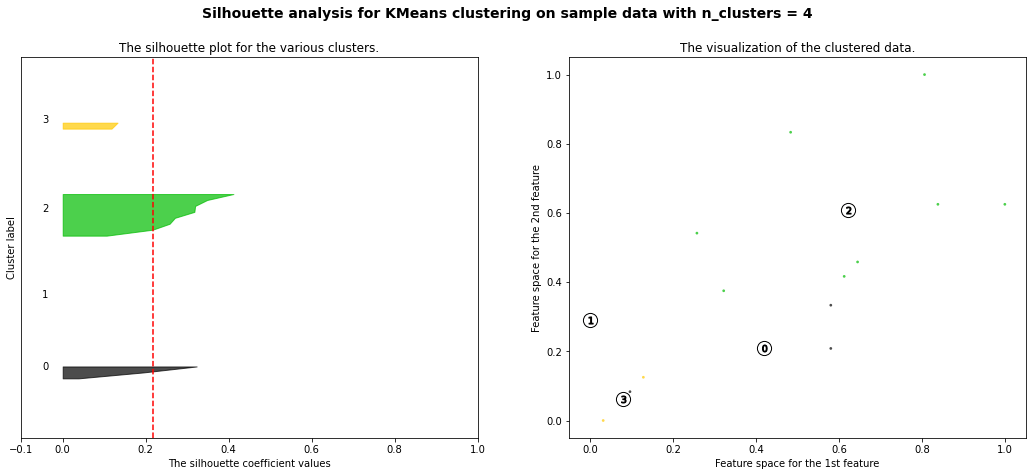

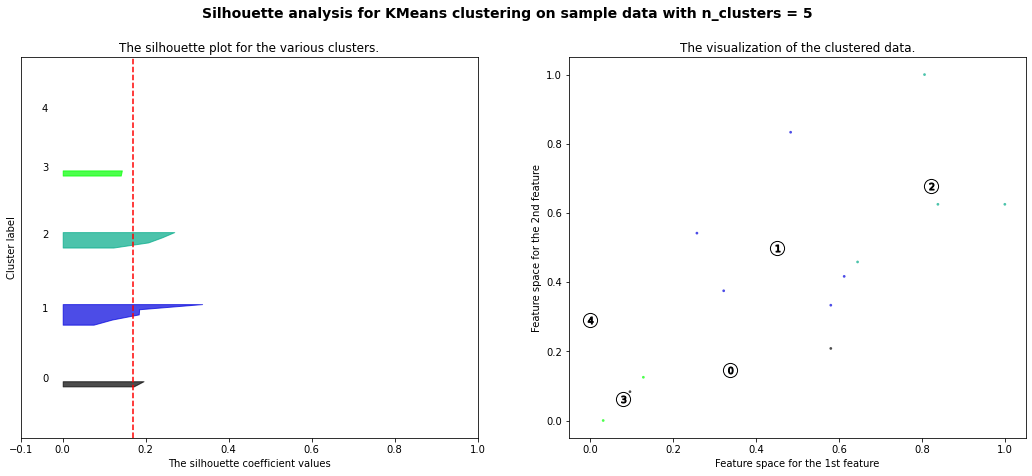

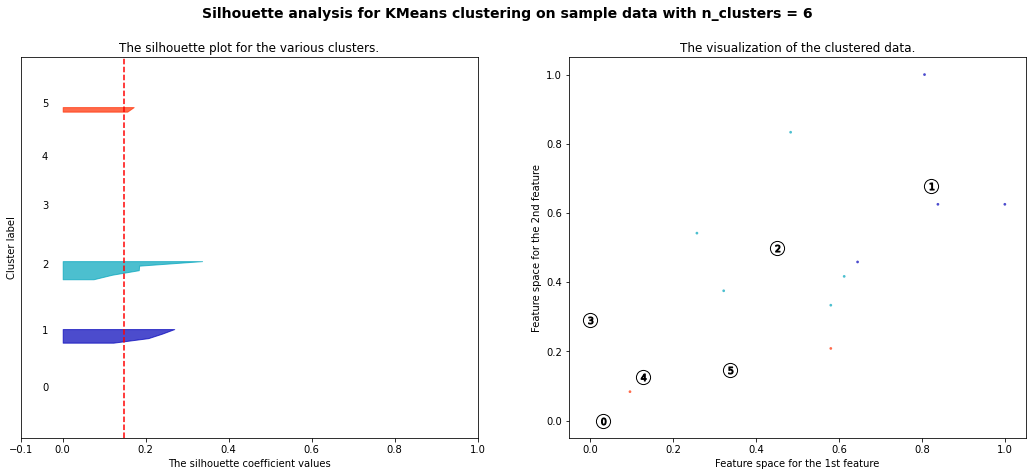

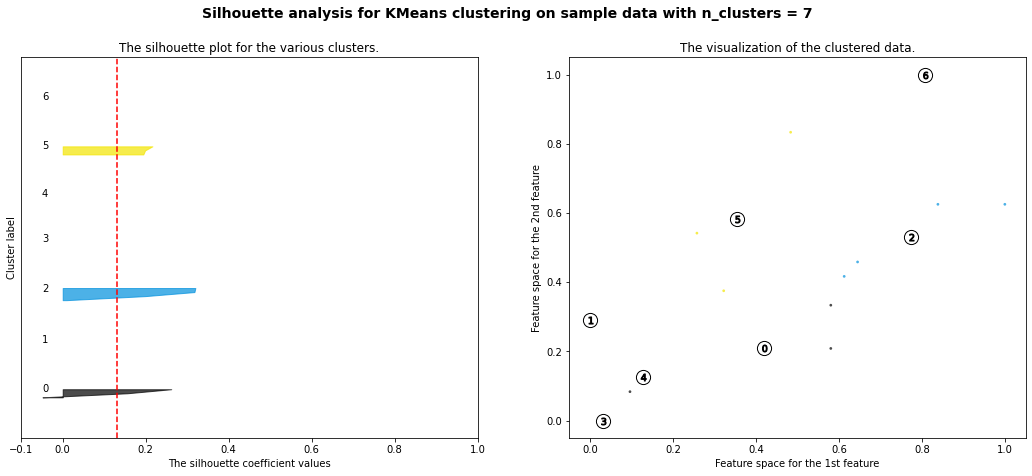

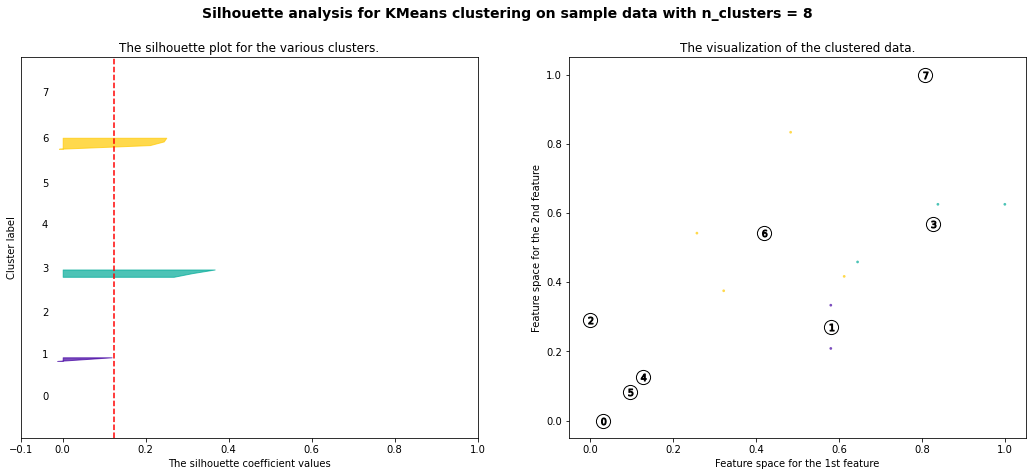

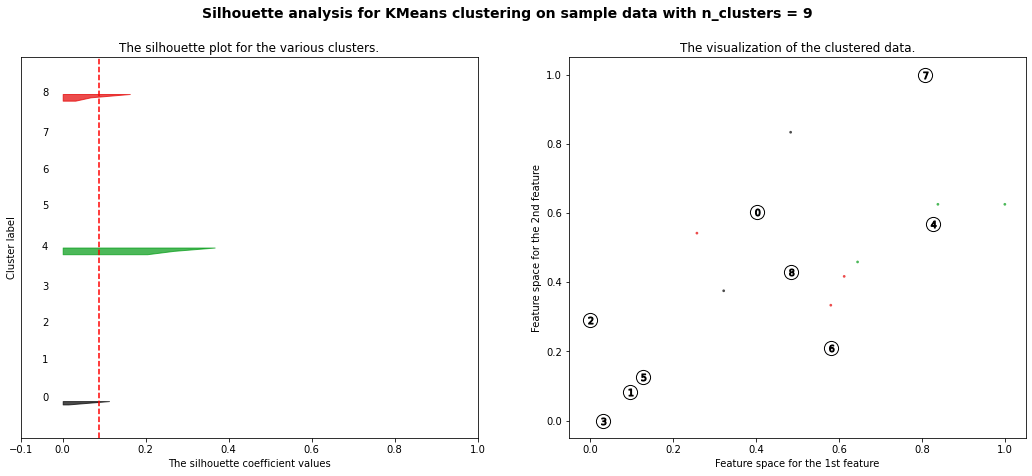

In [23]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)

    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print("Untuk n =", n_clusters,
          "Rata-rata silhouette_score :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_scaled[:, 0], x_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Dilihat dari nilai **koefisien Silhouette**, nilai K yang paling optimum adalah **3**

## K-Means

In [24]:
kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=123)

In [25]:
y_kmeans = kmeans.predict(x_scaled)
y_kmeans

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [26]:
print(kmeans.cluster_centers_)

[[0.61648746 0.5787037  0.70516609 0.87575057 0.71604938 0.74444444
  0.64082864 0.18537818 0.51666667 0.52991453 0.68709873 0.54320988
  0.20577174 0.29385421 0.28488207]
 [0.16774194 0.14166667 0.49423313 0.67776119 0.07407407 0.16
  0.33563091 0.46098448 0.06       0.13846154 0.48335155 0.46346667
  0.26571429 0.40839161 0.37461538]]


In [27]:
data_model['cluster'] = kmeans.labels_

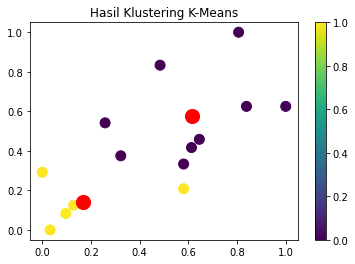

In [28]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data_model.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()
output

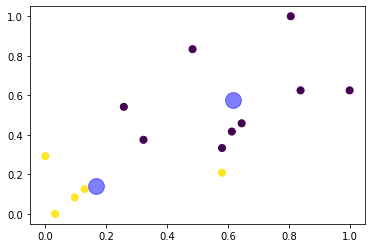

In [29]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=250, alpha=0.5);